# STA 141B Assignment 4

Due __Feb 22, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice scraping data from web pages.

## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

# Exercise 1.1 Solution

In [1]:
import requests
import requests_cache
import string
import nltk
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import datetime

requests_cache.install_cache("my_cache1")

# Function for Requests

# extract_links function

In [2]:
def extract_links(url):
    '''Takes a URL  from the article list and returns a list of article URLs that can be clicked on from the
    page downloaded from the URL'''
    
    try:
        # Make request
        request = requests.get(url) # home page
        soup = BeautifulSoup(request.content, "html.parser") # html parse

        # Obtain nonheadline article links
        links = soup.select("a[href]") # select all links with href attribute
        articles = [article["href"] for article in links if "php" in article["href"]] # non-headline article links have php at end of link

        # combine all article links
        unique_articles = list(set(articles)) # unique links
        full_links = [url + article[1:] if "http" not in article else article for article in unique_articles] # absolute path if not given
        full_links = [link for link in full_links if "sfchronicle" in link]
        results = full_links
        
    except:
        print("Page could not be Downloaded")
        results = None
        
    time.sleep(0.3)
        
    return results
        

# Test Function

#### Local

In [3]:
extract_links("https://www.sfchronicle.com/local")[:5]

['https://www.sfchronicle.com/localbayarea/heatherknight/article/Love-bloomed-at-City-Hall-in-2004-and-San-13533485.php',
 'https://www.sfchronicle.com/localbayarea/article/Two-new-ferry-terminals-address-the-practical-13624082.php',
 'https://www.sfchronicle.com/localbayarea/article/Lisa-Johnson-had-lived-in-her-beloved-house-her-13485755.php',
 'https://www.sfchronicle.com/localbayarea/article/High-times-for-cannabrides-to-be-at-Cannabis-13623945.php',
 'https://www.sfchronicle.com/localbayarea/heatherknight/article/The-baby-on-the-bus-goes-all-through-the-town-13550445.php']

#### Business

In [4]:
extract_links("https://www.sfchronicle.com/business/")[:5]

['https://www.sfchronicle.com/business/business/article/Lip-syncing-rules-the-world-but-Smule-hopes-its-13621486.php',
 'https://www.sfchronicle.com/business/news/world/article/Asian-stocks-slip-on-Wall-Street-leads-as-trade-13618821.php',
 'https://www.sfchronicle.com/business/business/article/Newsom-wants-users-to-profit-from-online-data-13617841.php',
 'https://www.sfchronicle.com/business/realestate/article/Two-bedroom-Craftsman-bungalow-open-Sunday-in-13620505.php',
 'https://www.sfchronicle.com/business/news/world/article/Asian-stocks-rally-on-hope-of-further-China-US-13624202.php']

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

# Exercise 1.2 Solution

In [5]:
def extract_data(url):
    '''Takes a url of an article and extracts relevant data pertaining to article in a dictionary'''
    
    # Request
    request = requests.get(url) # home page
    page = BeautifulSoup(request.content, "html.parser") # html parse
    time.sleep(0.3)
    
    # Url
    url = url
    
    # Title
    try: # title for most articles
        title = page.select_one(".header-title")
        title = title.text
    except:
        title = None
        
    if title is None: # title for different format articles
        try:
            title = page.select_one("div.article-title h1")
            title = title.text
        except:
            title = None
            try : # check for another different format
                title = page.select_one(".article-head h2")
                title = title.text
            except:
                title = None
            
         
    # Author
    try: # author for most articles
        author = page.select_one(".header-authors-name")
        author = author.text
    except:
        author = None
        
    if author is None: # check if two authors
        try: 
            author = page.select_one(".header-author-time span")
            author = author.text
        except:
            author = None
    
    if author is None: # check author for different format articles
        try:
            author = page.select_one(".byline a")
            author = author.text
        except:
            author = None
    
    if author == "":
        author = None
        
    
    # Dates
    try: # articles with post date and updated
        dates = page.select("time")
        both_dates = [date["datetime"] for date in dates] # extract publish date and updated date
        date = both_dates[0]
        date_updated = both_dates[1]
    except:
        try: # articles with only post date
            dates = page.select("time") 
            both_dates = [date["datetime"] for date in dates] # extract publish date and updated date
            date = both_dates[0]
            date_updated = None
        except: # no dates
            date = None
            date_updated = None
    
    # Text
    try: # text for most articles
        all_text = page.select(".main .body > p") # all paragraph texts, excluding author information
        all_text = [text.text for text in all_text]
        text = "\n".join(all_text)
    except:
        text = None
        
    if text is None or text == "": # text for different formatted articles
        try:
            all_text = page.select(".article-body > p") 
            all_text = [text.text for text in all_text]
            text = "\n".join(all_text)
        except:
            text = None
            
    if text is None or text == "": # text for different formatted articles      
        try: # check for another different format
            all_text = page.select(".article-text > p")
            all_text = [text.text for text in all_text]
            text = "\n".join(all_text)
        except:
            text = None
            
    
    # Results
    results = {'url': url,
               'title': title,
               'text': text,
               'author': author,
               'date': date,
               'date_updated': date_updated}
    
    return results
    
# selecting childs and not descendants <https://stackoverflow.com/questions/39499976/how-to-find-element-with-specific-parent>
# join elements in a list <https://stackoverflow.com/questions/12453580/concatenate-item-in-list-to-strings>

In [6]:
extract_data("https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php")

{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book “Gardenlust: A Botanical Tour of the World’s Best New Gardens” by Christopher Woods (Timber Press, 416 pages, $40) shows you gardens from around the globe, including some surprising places such as Oman, Singapore and the island of Nevis in the West Indies, all of them created in the past 20 years. Fifty gardens or designers are featured. The sites are all engaging; some are breathtaking.\nWoods, the author and major photographer of the book, began his career as a gardener at Kew Gardens in London. He then worked at a number of public gardens in England and the U.S., including 20 years as director and chief designer of Chanticleer Arboretum in Pennsylvania. (I have been to Chanticleer and have seen the Ruins Garden he created there from the stone and slate ruins of the home of the orig

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

# Exercise 1.3 Solution

## Categories

In [7]:
# Biz+Tech category
biz_tech_articles = extract_links("https://www.sfchronicle.com/business/")

# other two categories
local_articles = extract_links("https://www.sfchronicle.com/local/")
sports_articles = extract_links("https://www.sfchronicle.com/sports/")

## Article Data

In [8]:
biz_tech_data = [extract_data(article) for article in biz_tech_articles]
local_data = [extract_data(article) for article in local_articles]
sports_data = [extract_data(article) for article in sports_articles]

# Big Data Frame

In [9]:
# combine all thre data frames into one big df
# biz tech
biz_tech_df = pd.DataFrame(biz_tech_data)
biz_tech_df["category"] = "biz_tech"

# local df
local_df = pd.DataFrame(local_data)
local_df["category"] = "local"

# big df
sports_df = pd.DataFrame(sports_data)
sports_df["category"] = "sports"

# big df
big_df = pd.concat([biz_tech_df, local_df, sports_df], axis = 0).reset_index(drop = True)

# concatenate rows of multiple data frames <https://stackoverflow.com/questions/28135436/concatenate-rows-of-two-dataframes-in-pandas>

# Clean DataFrame

In [10]:
# clean author column
# remove extra spacing and extra words
def clean_author(author):
    '''Takes an author string and corrects formatting'''
    
    if author is None: # don't clean if there is no text
        return None
    
    # remove uncessecary words
    author = author.strip()
    author = author.replace("By ","")
    
    # remove publisher
    if "," in author:
        split_author = author.split(",")
        author = split_author[0]
    
    # Address empty strings
    if author is not None and len(author) == 0:
        author = None
        
    return author

def clean_text(text):
    '''Takes a text string and corrects formatting'''
    
    if text is None: # don't clean if there is no text
        return None

    # Address empty strings
    if text is not None and len(text) == 0:
        text = None
        
    return text

def convert_to_date(text):
    '''Takes text and converts it into a date time object'''
    
    if text is None :
        return None
    
    # convert to date time
    

In [16]:
# clean all rows in columns that need to be cleaned
big_df["author"] = big_df["author"].apply(clean_author)
big_df["text"] = big_df["text"].apply(clean_text)

# convert types of dates
big_df['date'] = pd.to_datetime(big_df['date'])
big_df['date_updated'] = pd.to_datetime(big_df['date_updated'])

big_df

,author,date,date_updated,text,title,url,category
0,Sophia Kunthara,2019-02-17 12:00:00,2019-02-17 12:00:35,"A decade into making musical performance apps,...","Lip-syncing rules the world, but Smule hopes i...",https://www.sfchronicle.com/business/business/...,biz_tech
1,ANNABELLE LIANG and MATT OTT,2019-02-15 12:23:52,2019-02-15 12:26:25,SINGAPORE (AP) — World stock markets bounced b...,World stocks recover as US-China trade talks e...,https://www.sfchronicle.com/business/news/worl...,biz_tech
2,Don Thompson,2019-02-14 22:43:14,NaT,SACRAMENTO — Gov. Gavin Newsom set off a flurr...,Newsom wants users to profit from online data,https://www.sfchronicle.com/business/business/...,biz_tech
3,None,2019-02-15 21:10:34,NaT,"Exquisite woodwork, a level-out deck and a pri...",Two-bedroom Craftsman bungalow open Sunday in ...,https://www.sfchronicle.com/business/realestat...,biz_tech
4,ANNABELLE LIANG,2019-02-18 03:31:32,2019-02-18 03:34:21,SINGAPORE (AP) — Asian markets were broadly hi...,Asian stocks rally on hope of further China-US...,https://www.sfchronicle.com/business/news/worl...,biz_tech
5,J.D. Morris,2019-02-14 04:59:31,2019-02-14 23:57:55,While millions more Pacific Gas and Electric C...,PG&E says it’s still trying to limit power shu...,https://www.sfchronicle.com/business/business/...,biz_tech
6,J.D. Morris,2019-02-11 23:04:43,2019-02-11 23:05:47,Half of the PG&E Corp. board of directors will...,PG&E to replace half of its board in wake of b...,https://www.sfchronicle.com/business/business/...,biz_tech
7,San Francisco Marine Exchange,2019-02-15 21:21:38,NaT,Ship traffic\nDue to arrive today\nDue to depa...,"Ship traffic, February 19",https://www.sfchronicle.com/business/business/...,biz_tech
8,Dominic Fracassa,2019-02-15 00:55:14,2019-02-15 00:56:10,"More than 250,000 San Francisco homes and busi...",CleanPowerSF tripling households served with m...,https://www.sfchronicle.com/business/bayarea/a...,biz_tech
9,Kathleen Pender,2019-02-16 12:00:00,2019-02-17 05:47:29,Readers had several questions about my recent ...,Answers to readers’ tax questions on college s...,https://www.sfchronicle.com/business/business/...,biz_tech


In [12]:
big_df.info() # Check if most Data is extracted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
author          175 non-null object
date            168 non-null datetime64[ns]
date_updated    146 non-null object
text            177 non-null object
title           178 non-null object
url             179 non-null object
category        179 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 9.9+ KB


__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

Text in articles have some words that are not helpful for identifying recent topics so we will use  `get_tokenized_words` to get a list of the tokens/words in the article that do not include the unwanted words. Because we will be applying `get_tokenized_words` to each row in a data frame we get a list of lists. So, we will use another function, `format_tokens` to get an unnested list whose elements are just the tokens.

In [13]:
def get_tokenized_words(text) :
    '''Takes text string and after tokenizing it, removes excess words in a list'''
    
    # identify unhelpful words
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords += ["said","would", "percent","year", "companies", "years", "going", "back","think", "play", "pg", "also", "san", "city", "one", "like", "new", "could", "first", "get", "last", "two", "\'s", "got"]
    punctuations = string.punctuation + "\'" + "\"" + "`" + "``" + '’' + '“' + '”' + '—'
    
    if text is None:
        return None
    
    # remove unhelpful words
    try:
        list_of_words = nltk.tokenize.word_tokenize(text) # tokenize words
        tokenized_words = [word.strip() for word in list_of_words] # remove extra space
        tokenized_words = [word.lower() for word in list_of_words] # lower case all words
        tokenized_words = [word for word in tokenized_words if word not in stopwords] # remove stop words
        cleaned_tokenized_words = [word for word in tokenized_words if word not in punctuations] # remove punctuations
    except:
        return None
    
    return cleaned_tokenized_words # returns a list

def format_tokens(nested_list):
    '''Takes a nested_list, a list of lists where each element is a list returned from the cleaned_tokenized_words. 
    Then flattens the elements in the nested list into a single list by summing the list together'''
    
    unnested_list = []
    for word_list in nested_list:
        unnested_list += word_list
        
    unnested_list = [word for word in unnested_list if len(word) > 1] # remove just characters
    
    return unnested_list

In [14]:
# frequency distribution objects for all categories

# overall (big_df)
big_toks = [get_tokenized_words(row) for row in big_df["text"] if row is not None] # list of list containing tokens, ignore rows with no text
big_toks = format_tokens(big_toks) # list of just tokens
big_fdist = nltk.FreqDist(big_toks) # Identify frequency of each token

# local
local_toks = [get_tokenized_words(row) for row in local_df["text"] if row is not None]
local_toks = format_tokens(local_toks)
local_fdist = nltk.FreqDist(local_toks)

# biz tech
biztech_toks = [get_tokenized_words(row) for row in biz_tech_df["text"] if row is not None]
biztech_toks = format_tokens(biztech_toks)
biztech_fdist = nltk.FreqDist(biztech_toks)

# sports
sports_toks = [get_tokenized_words(row) for row in sports_df["text"] if row is not None]
sports_toks = format_tokens(sports_toks)
sports_fdist = nltk.FreqDist(sports_toks)

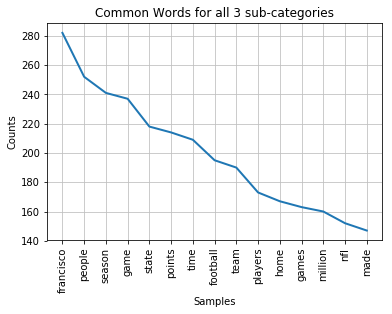

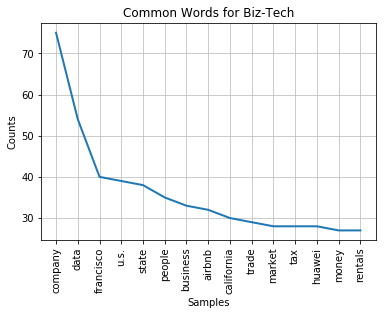

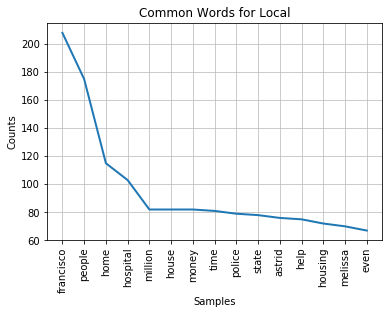

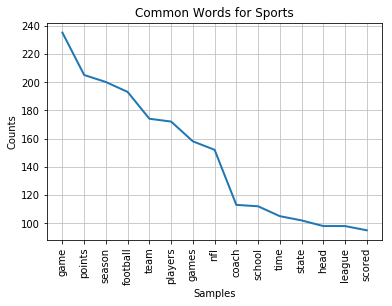

In [15]:
# plot big df of all three categories
plt.title('Common Words for all 3 sub-categories')
big_fdist.plot(15,cumulative = False)

# plot biztech
plt.title('Common Words for Biz-Tech')
biztech_fdist.plot(15,cumulative = False)

# plot local
plt.title('Common Words for Local')
local_fdist.plot(15,cumulative = False)

# plot sports
plt.title('Common Words for Sports')
sports_fdist.plot(15,cumulative = False)

### What topics has the Chronicle covered recently?

We found the most common words mentioned in the articles, from this we can identify the topics that were covered recently. We see that some of the most common words mentioned in the text of the Chronicle articles include *San Francisco, people, season, game, state, points* From this we know that the topics that the Chronicle covered recently include the topic of the city of **San Francisco** which is not surprising since the Chronicle pertains to the "San Francisco" Chronicle, the topic of **sports** this may be due to the relevancy and popularity of their sports teams such as the Golden State Warriors or Giants; especially since SF is home to the most popular sports team in the NBA, the Warriors.

### How does the category affect the topics?
The category affects the topics, because we can see that the most common words in the text of a category compared to another is different. Looking at the graphs for the categories of sports, local, and biz-tech we see that the most common words is different and that the most common words are more related to the category they are under. The most common words for each category are an indication of different topics. For example, the most common words in sports seem to relate to football and basketball, while the local section's most common words relate to the city itself and the people, homes, and hospitals. Furthermore, for biz-tech we see that the topics relate to businesses, money, and the market in general.